# Data 695 Project Work

## Introduction:
Credit card fraud remains a major concern in the financial sector, causing substantial losses for both card issuers and consumers. 
Over $34 billion is lost annually to credit card fraud, a number that is expected to rise as digital transactions continue to grow.

## Part 1 - Exploratory Data Analysis (EDA):
First, we will perform EDA to understand the data distribution, identify trends, and detect outliers. Visualize relationships between variables to guide feature and model development.

In [40]:
# importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    mean_squared_error,
    f1_score,
    confusion_matrix,
    precision_score
)

In [3]:
# Loading the Credit card transaction data
df = pd.read_csv('financial_fraud_detection_dataset.csv')
df.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [4]:
df.shape

(5000000, 18)

In [4]:
# Checking for missing values
print(df.isnull().sum())

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64


In [6]:
# Checking dataset structures
print ("Dataset features:" ,df.columns.to_list, '\n' )
print ("Dataset dimension:", df.shape, '\n' )
print ("Descritive Statistic:" , df.describe(),)

print ("Data Strusture:" , df.info())


Dataset features: <bound method IndexOpsMixin.tolist of Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash'],
      dtype='object')> 

Dataset dimension: (5000000, 18) 

Descritive Statistic:              amount  time_since_last_transaction  spending_deviation_score  \
count  5.000000e+06                 4.103487e+06              5.000000e+06   
mean   3.589343e+02                 1.525799e+00             -3.881160e-04   
std    4.699333e+02                 3.576569e+03              1.000807e+00   
min    1.000000e-02                -8.777814e+03             -5.260000e+00   
25%    2.657000e+01                -2.562376e+03             -6.800000e-01   
50%    1.386700e+02                 8.4

In [7]:
# Checking for Duplicates and Missing Data
count_missing = df.isna().sum()
count_dup= df.duplicated().sum()

print(count_missing,'\n')
print(count_dup)


transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64 

0


In [8]:
# Setting a seed for reproducibility
df_sampled = df.sample(n=1_000_000, random_state=2025)
df_sampled.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
1292430,T1392430,2023-12-29T02:11:42.866560,ACC615878,ACC814287,11.65,transfer,restaurant,New York,web,False,NaN,4430.331401,0.62,17,0.39,ACH,167.91.60.84,D6162744
3003708,T3103708,2023-09-08T08:05:48.926040,ACC580493,ACC267535,1008.51,deposit,restaurant,Tokyo,mobile,False,NaN,5055.422794,0.35,18,0.15,ACH,85.88.143.14,D4447914
4552854,T4652854,2023-11-01T19:37:46.187098,ACC971778,ACC349770,22.89,transfer,utilities,Toronto,web,False,NaN,1261.548812,-1.34,14,0.36,ACH,84.197.121.199,D5406258
57044,T157044,2023-06-14T03:39:14.868514,ACC600594,ACC559559,395.58,withdrawal,entertainment,New York,web,False,NaN,NaN,0.81,3,0.89,UPI,79.150.82.143,D4763124
1916425,T2016425,2023-11-22T21:45:36.719683,ACC615708,ACC727596,24.37,payment,other,London,pos,False,NaN,2995.786797,-1.19,19,0.16,UPI,3.102.159.27,D5164015


In [28]:
df_sampled.shape

(1000000, 18)

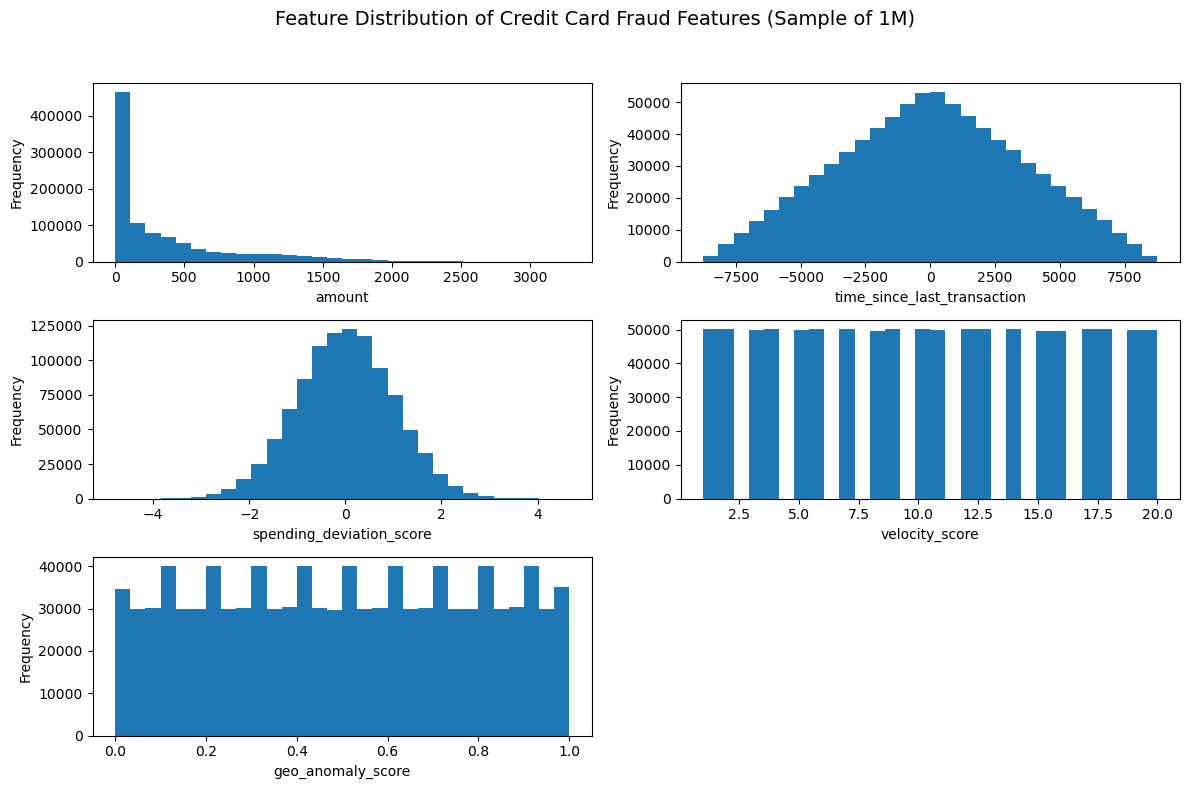

In [63]:
# Plotting histogram Grid for all numeric columns
axes = df_sampled.hist(figsize=(12, 8), bins=30, grid=False)
plt.suptitle('Feature Distribution of Credit Card Fraud Features (Sample of 1M)', fontsize=14)

# Adding axis labels
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())  
    ax.set_ylabel('Frequency')
    ax.set_title("")  

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


## Key Observations

1. **Amount:** It's right-skewed. Most transactions are small (below 100), with fewer large transactions indicating a potential for log transformation to reduce skew and improve model learning.

2. **Time_since_last_transaction:** It's symmetric. Thevalues are centered around 0 with a wide spread in both directions, suggesting balanced behavior.

3. **Spending_deviation_score:** It's normally distributed. Appears to be standardized, centered around 0 with symmetric tails. A strong feature as it reflects deviation from usual behavior.

4. **Velocity_score:** It's uniformlly distributed.	All values between 1 and 20 appear equally, possibly indicating an engineered feature. 

5. **Geo_anomaly_score:** It's roughly uniform.	Indicates equal spread of geographic anomaly scores. Possibly represent a scaled anomaly detection score from 0 to 1. Useful for detecting spatial fraud.


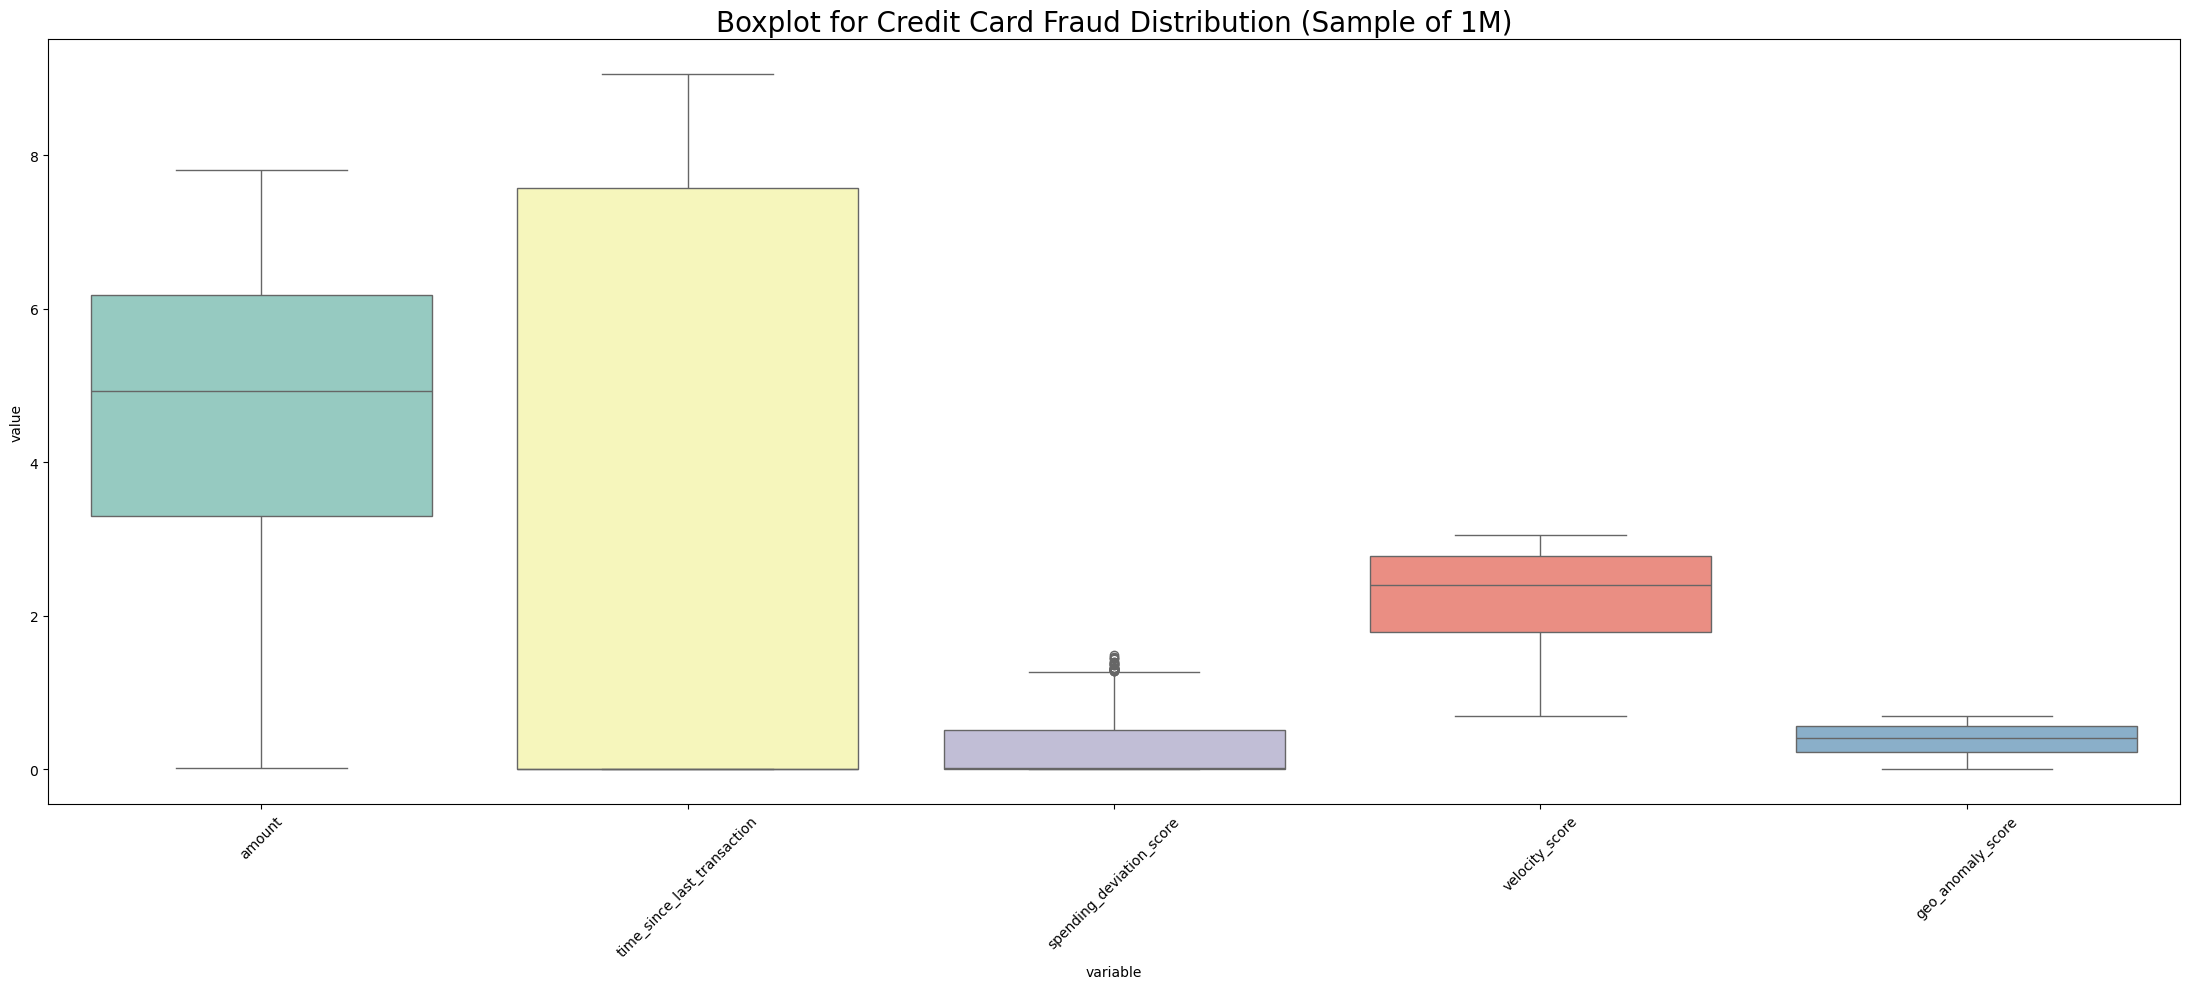

In [44]:
# Melting the DataFrame to long format for seaborn
df_melted = pd.melt(df_sampled_2[numeric_cols.columns])
df_melted['value'] = df_melted['value'].apply(lambda x: np.log1p(x) if x > 0 else 0)
plt.figure(figsize=(22, 10))

# Setting the x variable to hue and suppress the legend
sns.boxplot(x='variable', y='value', hue='variable', data=df_melted, palette='Set3', legend=False)

plt.title("Boxplot for Credit Card Fraud Distribution (Sample of 1M)", fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Key Observations

1. **Amount:** The distribution is right-skewed but well-contained after transformation. There's a wide range in values, possibly indicating transaction amounts vary significantly, potentially useful for fraud detection when large values occur.

2. **Time_since_last_transaction:** Extremely wide interquartile range, median is near the bottom, this indicates high variance in time gaps between transactions, fraudulent transactions may cluster or space out unusually, this could be a high-value feature.

3. **Spending_deviation_score:** Most values are tightly clustered near the bottom, but some noticeable outliers exist. This could suggest that fraud might be associated with rare but sharp deviations from typical spending behavior.

4. **Velocity_score:** Has a relatively balanced and compact distribution, indicating transaction frequency is more stable, but variation in extremes may still hold fraud-related insights.

5. **Geo_anomaly_score:** Very low range and tightly packed values, likely less predictive on its own, unless maybe paired with other location-based features.

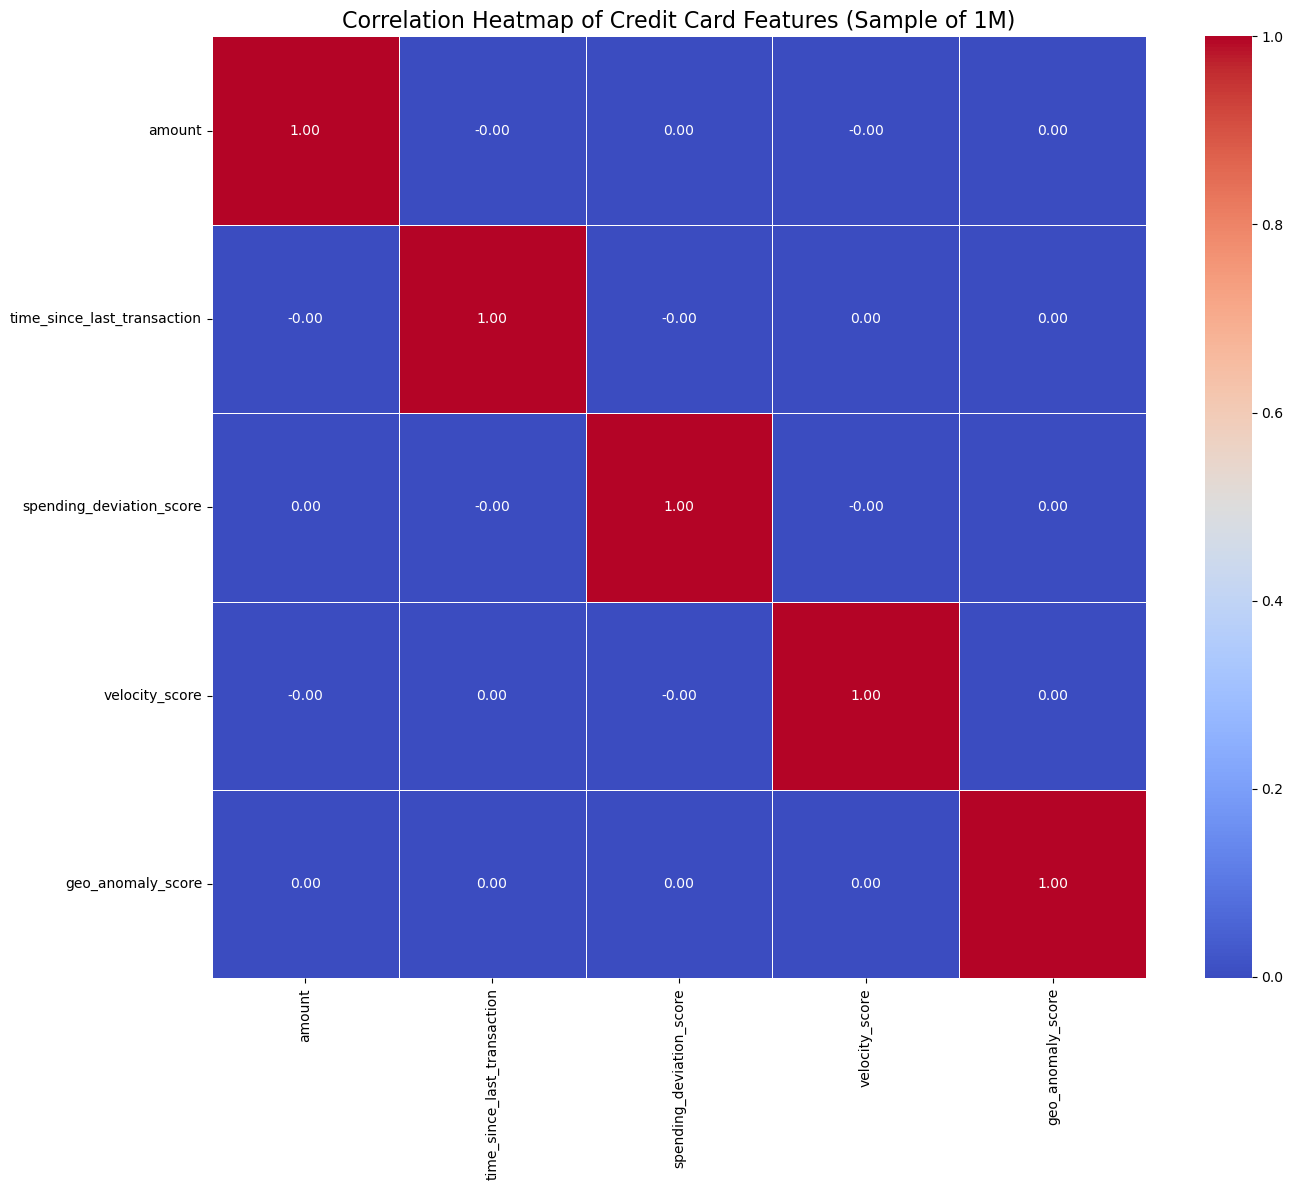

In [52]:
# Selecting numeric features only
numeric_cols = df_sampled.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Credit Card Features (Sample of 1M)', fontsize=16)
plt.tight_layout()
plt.show()


## Key Observations

1. **Zero or Near-Zero Correlation:** All off-diagonal values are close to 0.00, indicating no linear relationship between any pair of features.

2. **Feature Independence:** The lack of multicollinearity suggests that these features are statistically independent of one another. This could be beneficial for many machine learning models, especially linear models, as it avoids redundancy and improves model stability.

3. **Diagonal Values of 1.00:** Each feature is perfectly correlated with itself, as expected (r = 1.00 on the diagonal).

In [31]:
# Load the Cleaned Credit card transaction data
df_cleaned = pd.read_csv('cleaned_fraud_dataset.csv')
df_cleaned.head()

,timestamp,amount,transaction_type,merchant_category,location,device_used,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel
0,2023-12-18,28.44,transfer,retail,Singapore,web,False,0.23,11,0.93,wire_transfer
1,2023-02-06,64.88,payment,retail,Toronto,pos,False,0.44,4,0.40,wire_transfer
2,2023-07-26,5.68,transfer,online,Dubai,web,True,0.28,18,0.09,wire_transfer
3,2023-04-27,11.97,transfer,utilities,Toronto,atm,True,-1.31,1,0.63,wire_transfer
4,2023-03-14,191.39,withdrawal,retail,Tokyo,pos,False,1.10,12,0.16,UPI


In [37]:
# Splitting the data in 80% train and 20% test 


# Define the x predictor variables
X= df_cleaned.drop(columns=('is_fraud'),axis=1)


# Define y, target variable
y= df_cleaned["is_fraud"]


# Split into train and test data 
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.2)


# Calcualte proportion of fraudulent and genuine in training set
count_fraud =(y_train==1).sum() # count the number of fraudulent transactions
count_geniune =(y_train==0).sum() # count the number of genuine transactions


prop_fraud= count_fraud/len(y_train) # propostion of fraudulent transactions
prop_genuine= count_geniune/len(y_train) # proprtion of genuine transactions

print('Proportion of Fraudlent Transactions:', round(prop_fraud,2))
print('Proportion of Genuine Transactions:',round(prop_genuine,2))


X_train.shape


Proportion of Fraudlent Transactions: 0.33
Proportion of Genuine Transactions: 0.67


(430927, 10)

In [43]:
# Standardize the X Features

# We will only standardize continous variabes 

X = df_cleaned.drop(columns=['is_fraud', 'timestamp', 'location'])  # Drop target and non-numeric/unnecessary columns
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables using one-hot encoding

# Define target variable
y = df_cleaned['is_fraud'].astype(int)  # Convert boolean to integer (0 or 1)

# Split into training and testing sets (80% train, 20% test), maintaining class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Count fraud and genuine transactions in training data
count_fraud = (y_train == 1).sum()
count_genuine = (y_train == 0).sum()

# Compute proportions
prop_fraud = count_fraud / len(y_train)
prop_genuine = count_genuine / len(y_train)

# Display results
print('Proportion of Fraudulent Transactions:', round(prop_fraud, 4))
print('Proportion of Genuine Transactions:', round(prop_genuine, 4))
print("Shape of X_train:", X_train.shape)

Proportion of Fraudulent Transactions: 0.3333
Proportion of Genuine Transactions: 0.6667
Shape of X_train: (430927, 20)


In [69]:
X_train_continous = X_train.select_dtypes(include=['int64', 'float64'])

# Print the row indices (optional)
print("Row indices of continuous features:", X_train_continous.index)

# Print the continuous feature column names (this is usually what you want)
print("Continuous feature columns:", X_train_continous.columns.tolist())


Row indices of continuous features: Index([345412, 480928, 366564, 214938, 100648, 500675, 218194, 230279,  40532,
       178084,
       ...
       348169, 222722, 128105, 493959, 327261, 200189,  65637, 334343,  91688,
       342457],
      dtype='int64', length=430927)
Continuous feature columns: ['amount', 'spending_deviation_score', 'velocity_score', 'geo_anomaly_score']
